In [35]:
import pandas as pd
import numpy as np
import pyreadstat as ps
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
df_spss , meta = ps.read_sav('./data/Sorted dataset of School dropout.sav')
df_spss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 58 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Serial_no  210 non-null    float64
 1   Q_1        210 non-null    object 
 2   Q_2        210 non-null    float64
 3   Q_3        210 non-null    float64
 4   Q_4        210 non-null    float64
 5   Q_5        210 non-null    float64
 6   Q_6        200 non-null    float64
 7   Q_7        210 non-null    float64
 8   Drop_out   210 non-null    float64
 9   Q_8        210 non-null    float64
 10  Q_9        210 non-null    float64
 11  Q_10       210 non-null    float64
 12  Q_11       210 non-null    float64
 13  Q_12       210 non-null    float64
 14  Q_13       210 non-null    float64
 15  Q_14       210 non-null    object 
 16  Q_15       210 non-null    object 
 17  Q_16       210 non-null    float64
 18  Q_17       210 non-null    float64
 19  Q_18       210 non-null    float64
 20  Q_19      

In [37]:
df_spss['Drop_out']= df_spss['Drop_out'].astype('category')
df_spss.describe()
df_spss['Drop_out'].value_counts()

#Drop_out 1: Yes, 2:No

Drop_out
1.0    144
2.0     66
Name: count, dtype: int64

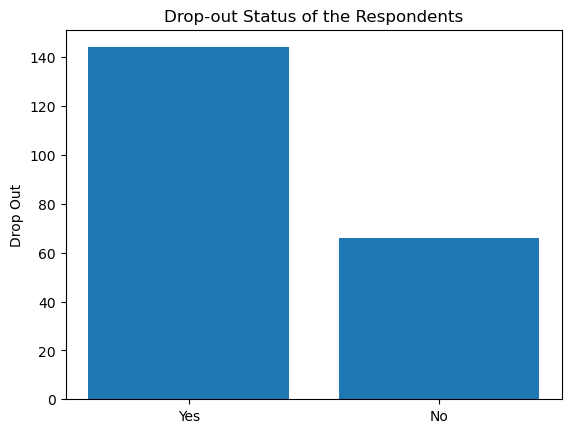

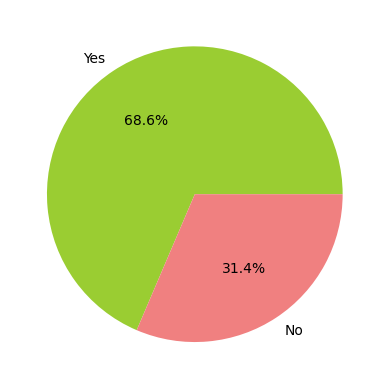

In [40]:
#Bar Chart
objects = ('Yes', 'No')
x_pos = np.arange(len(objects))
df_spss.Drop_out.value_counts()
status_fre=[144, 66] 
plt.bar(x_pos, status_fre)
plt.xticks(x_pos, objects)
plt.ylabel('Drop Out')
plt.title('Drop-out Status of the Respondents')
plt.show()

#Pie Chart of the Drop-out Variable
status_fre=[144, 66]
plt.pie(status_fre, labels=['Yes', 'No'], colors=['yellowgreen', 'lightcoral'],  autopct='%.1f%%')
plt.show()

In [43]:
# Create a dictionary to map old names to new names
column_mapping = {
    'Q_3': 'age',
    'Q_4': 'Number_of_family_members',
    'Q_5': 'Yearly_family_income',
    'Q_18': 'Total_siblings', 
    'Q_19': 'Number_of_siblings_droput'
}

# Rename the columns
df_spss.rename(columns=column_mapping, inplace=True)
df_excluded_first_column = df_spss.iloc[:, 3:]
df_excluded_first_column

,age,Number_of_family_members,Yearly_family_income,Q_6,Q_7,Drop_out,Q_8,Q_9,Q_10,Q_11,...,Q_37_vi,Q_37_vii,Q_37_viii,Q_37_ix,Q_37_x,Q_37_xi,Q_37_xii,Q_37_xiii,Q_37_xiv,Q_37_xv
0,27.0,8.0,150000.0,3.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,5.0
1,26.0,10.0,115000.0,0.0,0.0,1.0,1.0,3.0,3.0,1.0,...,2.0,1.0,1.0,1.0,2.0,2.0,2.0,5.0,5.0,4.0
2,26.0,6.0,120000.0,3.0,2.0,1.0,1.0,3.0,3.0,2.0,...,1.0,2.0,1.0,1.0,1.0,1.0,1.0,5.0,5.0,3.0
3,15.0,7.0,150000.0,2.0,2.0,1.0,2.0,3.0,3.0,2.0,...,1.0,5.0,1.0,1.0,1.0,1.0,1.0,5.0,5.0,1.0
4,20.0,5.0,90000.0,3.0,2.0,1.0,1.0,3.0,3.0,2.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,5.0,5.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,22.0,8.0,200000.0,2.0,2.0,2.0,3.0,2.0,2.0,2.0,...,2.0,1.0,1.0,1.0,2.0,2.0,2.0,5.0,5.0,2.0
206,14.0,5.0,450000.0,2.0,2.0,2.0,1.0,3.0,3.0,2.0,...,2.0,2.0,3.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0
207,13.0,5.0,300000.0,2.0,2.0,2.0,1.0,3.0,3.0,2.0,...,1.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,4.0
208,15.0,5.0,480000.0,2.0,2.0,2.0,1.0,3.0,3.0,2.0,...,4.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,4.0


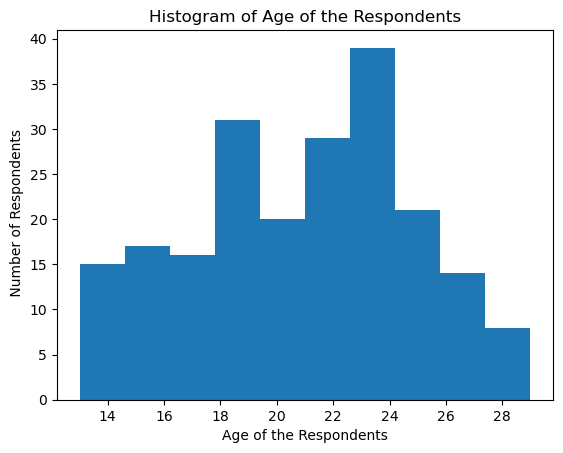

c:\Users\User\miniconda3\envs\urban_env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\miniconda3\envs\urban_env\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


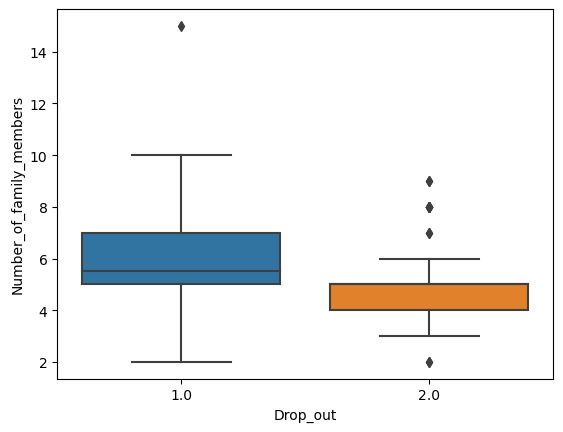

In [47]:
plt.hist(df_spss.age, bins= 10)
plt.xlabel('Age of the Respondents')
plt.ylabel(' Number of Respondents')
plt.title('Histogram of Age of the Respondents')
plt.show()

sns.boxplot(x='Drop_out',y='Number_of_family_members', data=df_spss)
plt.show()

c:\Users\User\miniconda3\envs\urban_env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\miniconda3\envs\urban_env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\miniconda3\envs\urban_env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\miniconda3\envs\urban_env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstan

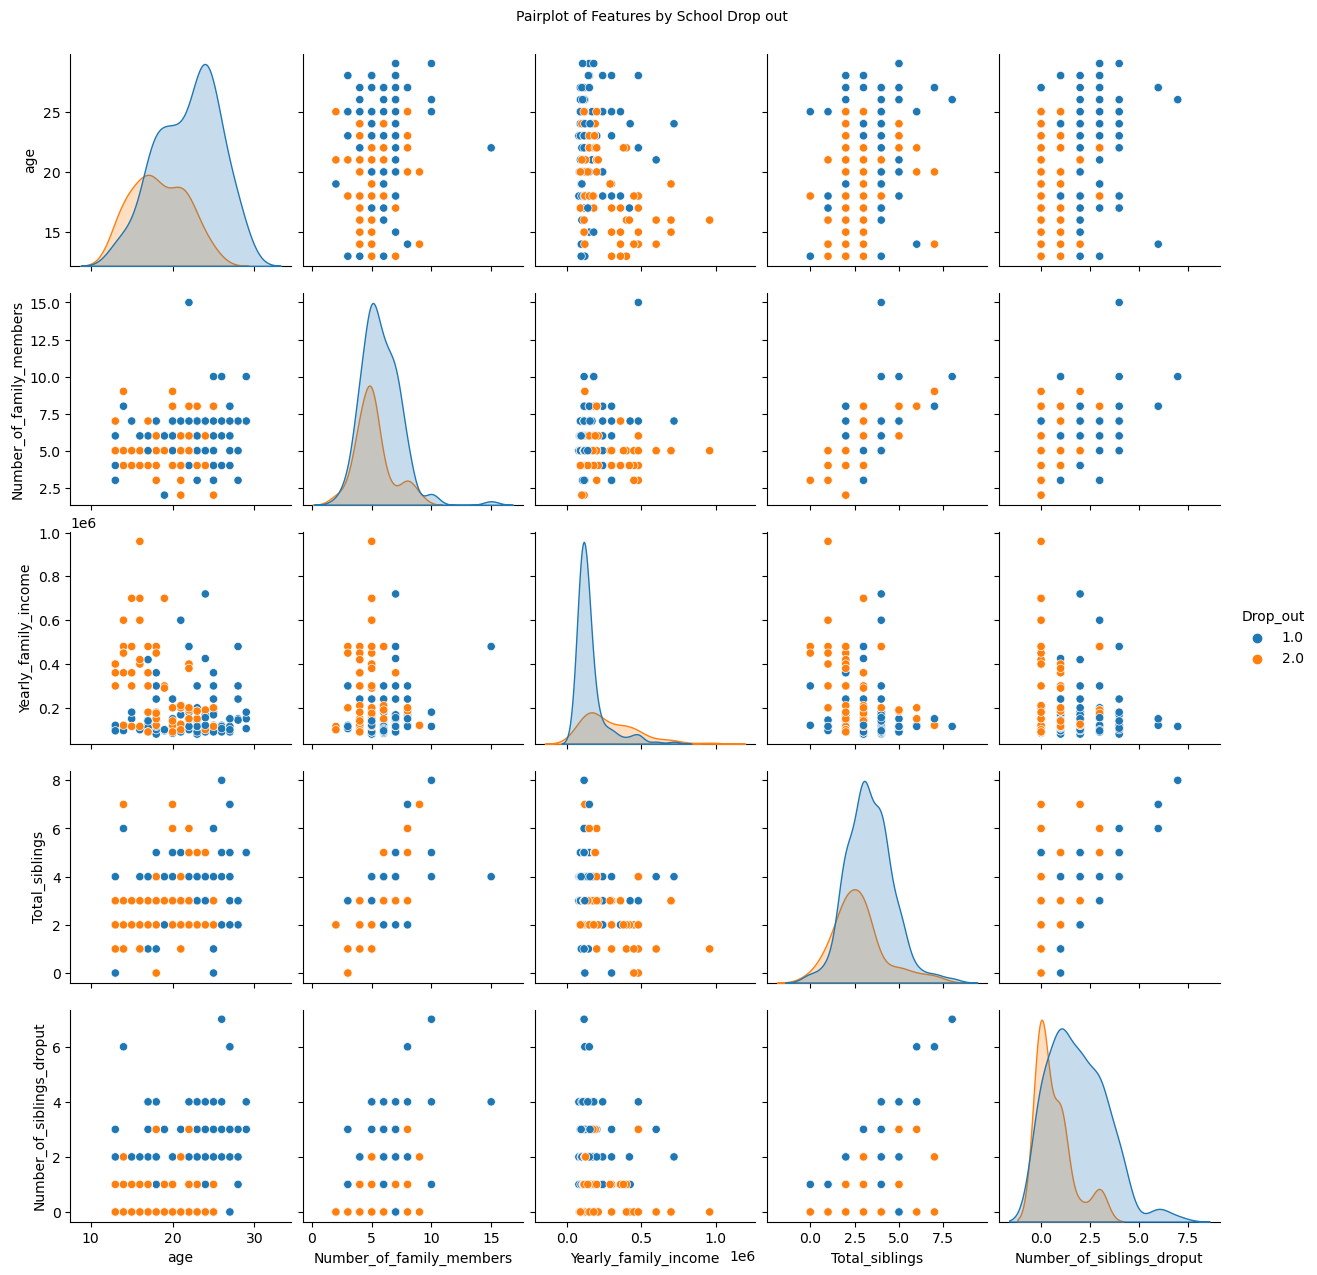

In [6]:
# Pairplot to visualize relationships between features
sns.pairplot(df_spss, hue='Drop_out', vars=['age','Number_of_family_members','Yearly_family_income','Total_siblings', 'Number_of_siblings_droput'])
plt.suptitle('Pairplot of Features by School Drop out', size=10, y=1.02)
plt.show()

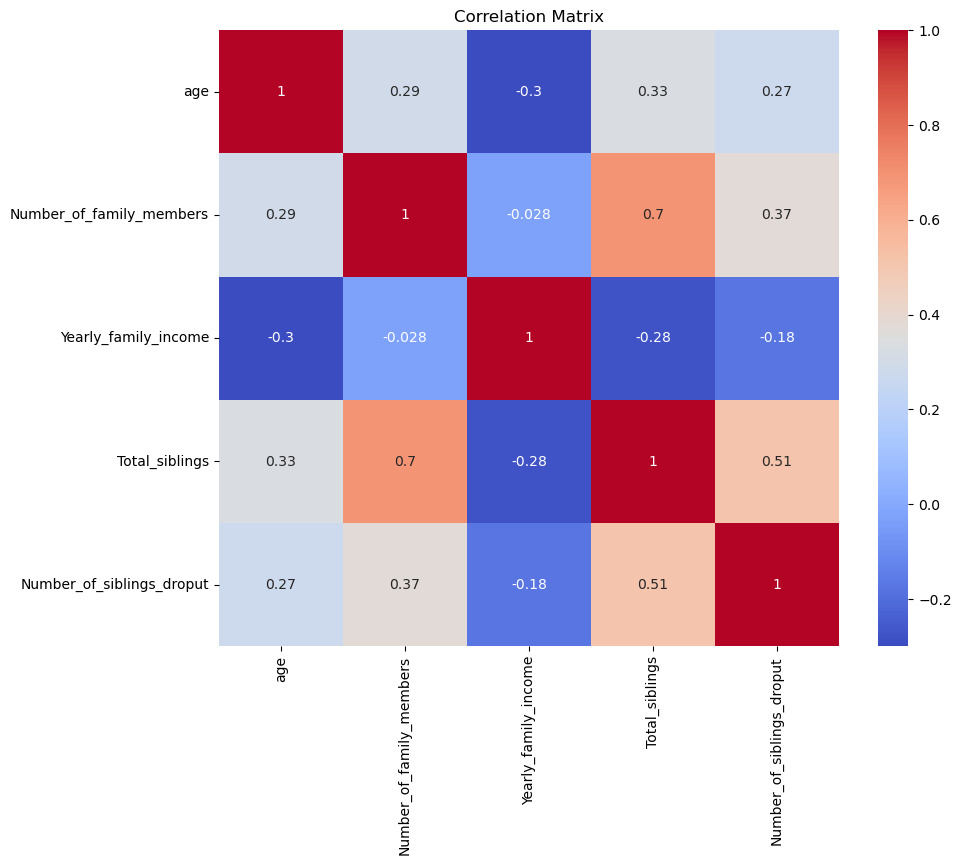

In [7]:
column_names = ['age', 'Number_of_family_members', 'Yearly_family_income', 'Total_siblings', 'Number_of_siblings_droput']

# Correlation matrix heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df_spss[column_names].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [25]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [26]:
x = df_spss[['age','Number_of_family_members','Yearly_family_income','Total_siblings', 'Number_of_siblings_droput']]
y = df_spss['Drop_out'].map({1:1, 2:0})
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.20, random_state =1020)

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.56      0.67         9
           1       0.89      0.97      0.93        33

    accuracy                           0.88        42
   macro avg       0.86      0.76      0.80        42
weighted avg       0.88      0.88      0.87        42

Confusion Matrix:
 [[ 5  4]
 [ 1 32]]
Accuracy Score: 0.8809523809523809
Precision Score: 0.8888888888888888
Recall Score:  0.9696969696969697
F1 Score: 0.9696969696969697


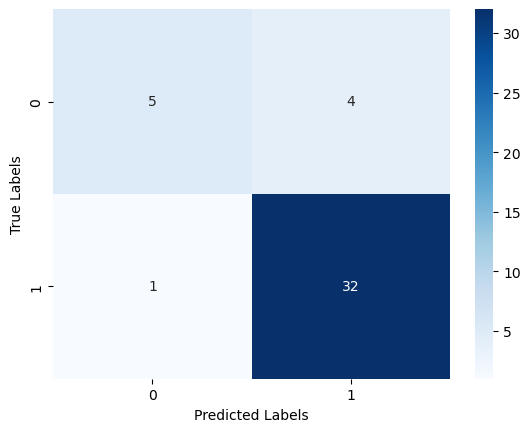

In [27]:
# Build and Evaluate Gaussian Naive Bayes Classifier
nb = GaussianNB()
nb.fit(x_train, y_train)
predictionsNB = nb.predict(x_test)

# Print Classification Report, Confusion Matrix, and Accuracy Score
print('Classification Report:\n', classification_report(y_test, predictionsNB))
print('Confusion Matrix:\n', confusion_matrix(y_test, predictionsNB))
print('Accuracy Score:', accuracy_score(y_test, predictionsNB))
print('Precision Score:',precision_score(y_test, predictionsNB))
print('Recall Score: ', recall_score(y_test, predictionsNB))
print('F1 Score:', recall_score(y_test, predictionsNB))

# Visualzie the confusion Matrix data
conf_matrix = confusion_matrix(y_test, predictionsNB)
sns.heatmap(conf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.33      0.40         9
           1       0.83      0.91      0.87        33

    accuracy                           0.79        42
   macro avg       0.67      0.62      0.63        42
weighted avg       0.76      0.79      0.77        42

Confusion Matrix:
 [[ 3  6]
 [ 3 30]]
Accuracy Score: 0.7857142857142857
Precision Score: 0.8333333333333334
Recall Score:  0.9090909090909091
F1 Score: 0.9090909090909091


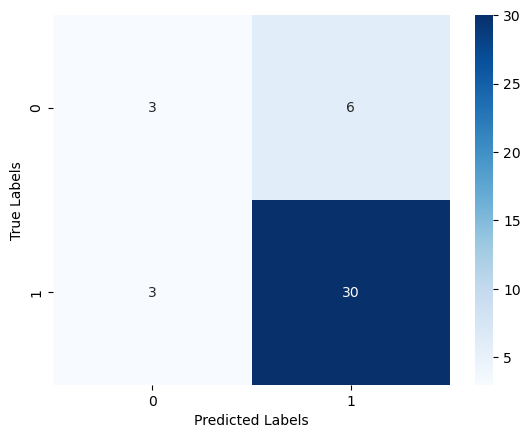

In [28]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(x_train, y_train)
predictions_dt = dt_classifier.predict(x_test)

# Evaluate and visualize results 
# Print Classification Report, Confusion Matrix, and Accuracy Score
print('Classification Report:\n', classification_report(y_test, predictions_dt))
print('Confusion Matrix:\n', confusion_matrix(y_test, predictions_dt))
print('Accuracy Score:', accuracy_score(y_test, predictions_dt))
print('Precision Score:',precision_score(y_test, predictions_dt))
print('Recall Score: ', recall_score(y_test, predictions_dt))
print('F1 Score:', recall_score(y_test, predictions_dt))

# Visualzie the confusion Matrix data
conf_matrix = confusion_matrix(y_test, predictions_dt)
sns.heatmap(conf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.67      0.71         9
           1       0.91      0.94      0.93        33

    accuracy                           0.88        42
   macro avg       0.83      0.80      0.82        42
weighted avg       0.88      0.88      0.88        42

Confusion Matrix:
 [[ 6  3]
 [ 2 31]]
Accuracy Score: 0.8809523809523809
Precision Score: 0.9117647058823529
Recall Score:  0.9393939393939394
F1 Score: 0.9393939393939394


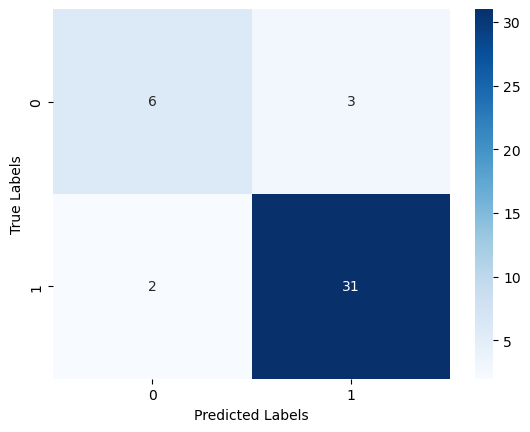

In [29]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier()
rf_classifier.fit(x_train, y_train)
predictions_rf = rf_classifier.predict(x_test)

# Evaluate and visualize results 
#rint Classification Report, Confusion Matrix, and Accuracy Score
print('Classification Report:\n', classification_report(y_test, predictions_rf))
print('Confusion Matrix:\n', confusion_matrix(y_test, predictions_rf))
print('Accuracy Score:', accuracy_score(y_test, predictions_rf))
print('Precision Score:',precision_score(y_test, predictions_rf))
print('Recall Score: ', recall_score(y_test, predictions_rf))
print('F1 Score:', recall_score(y_test, predictions_rf))

# Visualzie the confusion Matrix data
conf_matrix = confusion_matrix(y_test, predictions_rf)
sns.heatmap(conf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.56      0.59         9
           1       0.88      0.91      0.90        33

    accuracy                           0.83        42
   macro avg       0.75      0.73      0.74        42
weighted avg       0.83      0.83      0.83        42

Confusion Matrix:
 [[ 5  4]
 [ 3 30]]
Accuracy Score: 0.8333333333333334
Precision Score: 0.8823529411764706
Recall Score:  0.9090909090909091
F1 Score: 0.9090909090909091


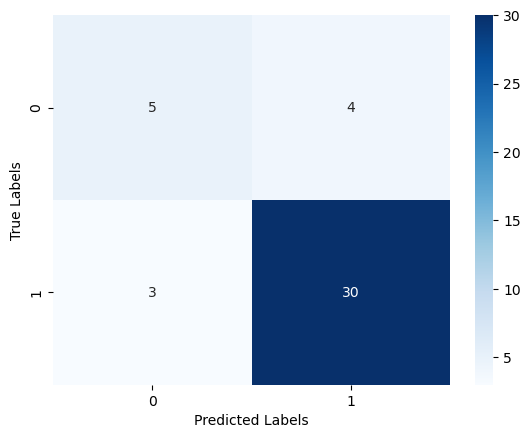

In [30]:
from sklearn.svm import SVC

svm_classifier = SVC()
svm_classifier.fit(x_train, y_train)
predictions_svm = svm_classifier.predict(x_test)


#Print Classification Report, Confusion Matrix, and Accuracy Score
print('Classification Report:\n', classification_report(y_test, predictions_svm))
print('Confusion Matrix:\n', confusion_matrix(y_test, predictions_svm))
print('Accuracy Score:', accuracy_score(y_test, predictions_svm))
print('Precision Score:',precision_score(y_test, predictions_svm))
print('Recall Score: ', recall_score(y_test, predictions_svm))
print('F1 Score:', recall_score(y_test, predictions_svm))

# Visualzie the confusion Matrix data
conf_matrix = confusion_matrix(y_test, predictions_svm)
sns.heatmap(conf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [22]:
# Continue with model fitting
logit_model = sm.Logit(y, x)
result = logit_model.fit()
print(result.summary2())


Optimization terminated successfully.
         Current function value: 0.417527
         Iterations 7
                             Results: Logit
Model:                  Logit              Method:             MLE       
Dependent Variable:     Drop_out           Pseudo R-squared:   0.329     
Date:                   2023-11-26 19:21   AIC:                185.3614  
No. Observations:       210                BIC:                202.0970  
Df Model:               4                  Log-Likelihood:     -87.681   
Df Residuals:           205                LL-Null:            -130.72   
Converged:              1.0000             LLR p-value:        8.9363e-18
No. Iterations:         7.0000             Scale:              1.0000    
-------------------------------------------------------------------------
                           Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-------------------------------------------------------------------------
age                        0.0998   0.03

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.56      0.67         9
           1       0.89      0.97      0.93        33

    accuracy                           0.88        42
   macro avg       0.86      0.76      0.80        42
weighted avg       0.88      0.88      0.87        42

Confusion Matrix:
 [[ 5  4]
 [ 1 32]]
Accuracy Score: 0.8809523809523809
Precision Score: 0.8888888888888888
Recall Score:  0.9696969696969697
F1 Score: 0.9696969696969697


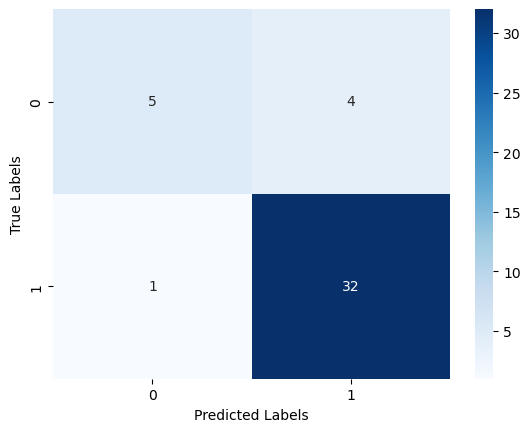

In [31]:
from sklearn.linear_model import LogisticRegression
# Create an instance of Logistic Regression Classifier and
model = LogisticRegression()
model.fit(x_train, y_train)

prediction_blg = model.predict(x_test)
model.score(x_test,y_test)
print('Classification Report:\n',classification_report(y_test, prediction_blg))
print('Confusion Matrix:\n',confusion_matrix(y_test, prediction_blg))
print('Accuracy Score:',accuracy_score(y_test, prediction_blg))
print('Precision Score:',precision_score(y_test, prediction_blg))
print('Recall Score: ', recall_score(y_test, prediction_blg))
print('F1 Score:', recall_score(y_test, prediction_blg))


# Visualzie the confusion Matrix data
conf_matrix = confusion_matrix(y_test, prediction_blg)
sns.heatmap(conf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

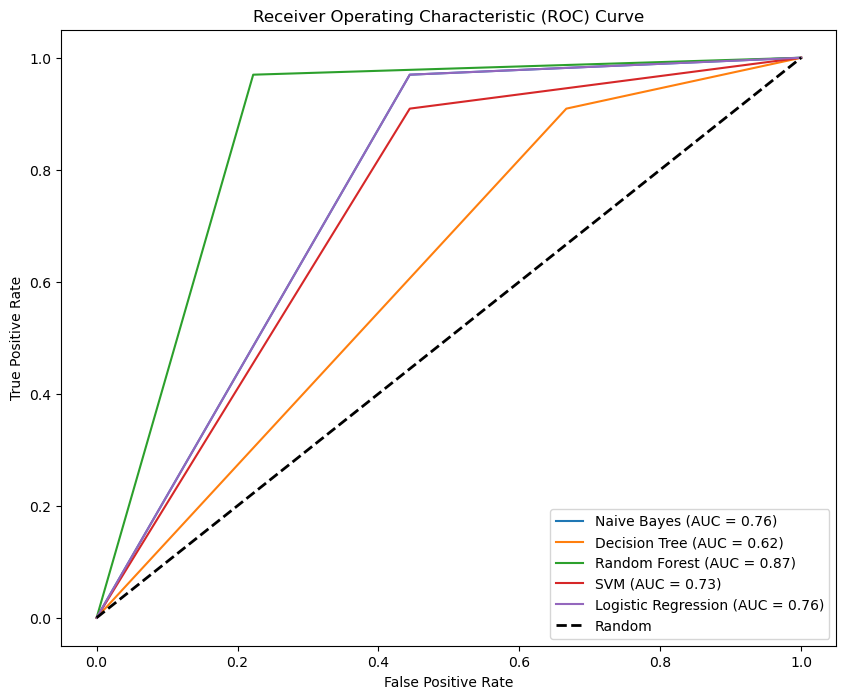

In [24]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# predictionsNB, predictions_dt, predictions_rf, predictions_svm, and prediction_blg are model predictions
predictions_list = [predictionsNB, predictions_dt, predictions_rf, predictions_svm, prediction_blg]
algorithm_names = ['Naive Bayes', 'Decision Tree', 'Random Forest', 'SVM', 'Logistic Regression']

plt.figure(figsize=(10, 8))

for i, predictions in enumerate(predictions_list):
    fpr, tpr, _ = roc_curve(y_test, predictions) 
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'{algorithm_names[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
